# Homework # 4 Naive BAYES Classifier

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm.

### Dataset - Diabetes dataset

This dataset consists of 768 observations & 8 numerical independent variables.
Dependent and target variable is OUTCOME. 1 means diabetes test result being positive, 0 means indicates negative.

Pregnancies: Number of Times Being Pregnant

Glucose: Plasma Glucose Concentration (a 2 hours in an oral glucose tolerance test)

BloodPressure: Diastolic Blood Pressure (mm Hg)

SkinThickness: Triceps Skin Fold Thickness (mm)

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes Pedigree Function

Age: Age

Outcome: Class variable ( 0 - 1)



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_validate
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot  as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

# Allows multiple rendering for a single block to enable showing parallel tables
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Step 1 - Write code to Read data from dataset into pandas dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/diabetes.csv')

Step 2 - a) Write code to display dataset info
b) Print 10 rows from dataset.

In [ ]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


**Step** 3 - Write code to remove Pregnancy column

In [ ]:
df.drop(['Pregnancies'], axis=1, inplace=True)

Step 4 - Write code to display info of dataset and check shape of dataset.

In [ ]:
print(df.shape)

(768, 8)


The data set contains 768 observations(rows) and 9 variables

## Step 5 - Write code to clean data

In [ ]:
df_dirty = df.copy()

In [ ]:
# Replace zeros in the Insulin column with the median value
median_value = df['Insulin'][df['Insulin'] != 0].median()
df['Insulin'] = df['Insulin'].replace(0, median_value)

print("Median value used:", median_value)

Median value used: 155.5482233502538


In [ ]:
#Replace zeros in the SkinThickness
median_value_skin = df['SkinThickness'][df['SkinThickness'] !=0].median()
df['SkinThickness'] = df['SkinThickness'].replace(0, median_value_skin)

print('Median value used:', median_value_skin)

Median value used: 29.0


In [ ]:
df.head(10)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,155.548,33.600,0.627,50,1
1,85,66,29,155.548,26.600,0.351,31,0
2,183,64,29,155.548,23.300,0.672,32,1
3,89,66,23,94.000,28.100,0.167,21,0
4,137,40,35,168.000,43.100,2.288,33,1
5,116,74,29,155.548,25.600,0.201,30,0
6,78,50,32,88.000,31.000,0.248,26,1
7,115,0,29,155.548,35.300,0.134,29,0
8,197,70,45,543.000,30.500,0.158,53,1
9,125,96,29,155.548,0.000,0.232,54,1


In [ ]:
df_target = df['Outcome']

Step 6 - Split data into training and testing sets ( 80: 20 ratio)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df_target, test_size=0.2)

#### **Step #7: Initialize your model**




In [ ]:
nb_model = GaussianNB()
nb_model

GaussianNB()

#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

In [ ]:
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

GaussianNB()

## Step 9 - Predict using model on test data

In [ ]:
y_pred = nb_model.predict(X_test)
print('Predicted values:', y_pred[:10])
print('Actual values', y_test[:10].values)

Predicted values: [0 0 0 0 0 1 0 0 0 0]
Actual values [0 1 1 0 0 1 0 1 0 0]


7 correct out of 10

## Step 10 - Confusion Matrix

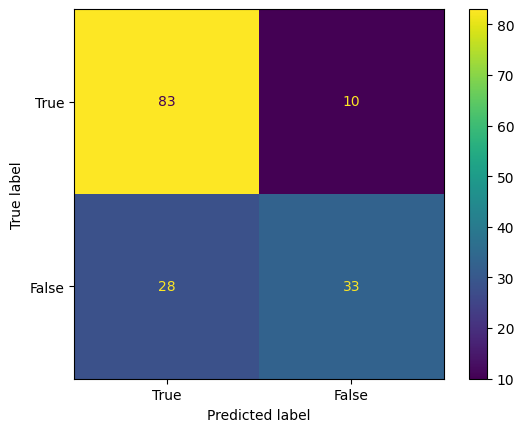

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True, False])

cm_display.plot()
plt.show()

## Step 11 -  Find accuracy of model

In [ ]:
TN, FP, FN, TP = cm.ravel()

print('Accuracy: ', (TP + TN) / (TN + TP + FN + FP) * 100)
print('\nPrecision: ', (TP) / (TP + FP) * 100)
print('\nRecall: ', (TP) / (TP + FN) * 100)
print('\nSpecificity: ', (TN) / (TN + FP) * 100)

Accuracy:  75.32467532467533

Precision:  76.74418604651163

Recall:  54.09836065573771

Specificity:  89.24731182795699


Model Evaluation Summary
The Naive Bayes classifier achieved an accuracy of ~75%, which indicates a reasonably good performance for this dataset.
The model performs well at predicting non-diabetic cases but occasionally misses diabetic ones due to class imbalance and feature correlations.
Further improvement could be achieved using models like Logistic Regression or Random Forest.